In [47]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_df(df, title, save_path):
    ax = sns.boxplot(data=df.iloc[:-1, :])   #eliminates class
    ax.set(xticklabels=[])
    ax.tick_params(bottom=False)
    ax.set(xlabel="Samples", ylabel="Log2 expression values", title=title)
    
    boxes = ax.artists
    for i,box in enumerate(boxes):
        if df.iloc[-1,i] == 1:
            box.set_facecolor('r')
        else:
            box.set_facecolor('b')
    
    plt.savefig(save_path+title+'_dist.pdf')
    plt.show()
    return

def get_n_class(df, cls, n):
    selected = df.loc[df['class']==cls, :]
    selected = selected.sample(frac=1)
    try:
        return selected.iloc[:n, :]
    except:
        return selected
    
path = "/home/colombelli/Documents/arrayexpress/"

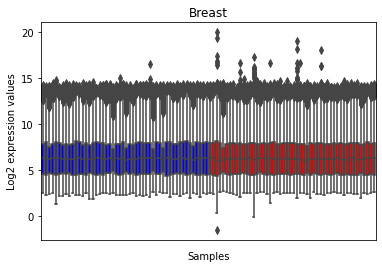

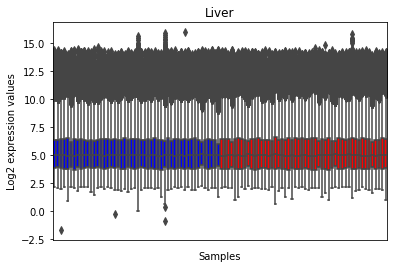

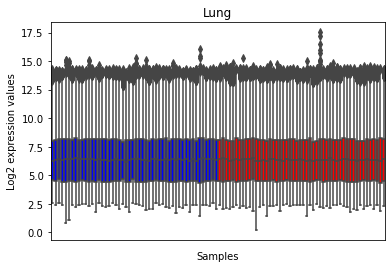

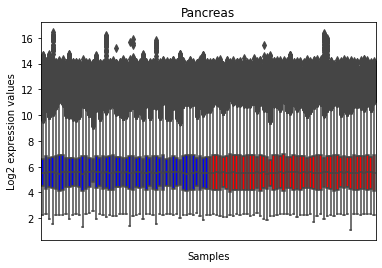

In [48]:
datasets = ["breast", "liver", "lung", "pancreas"]

for dataset in datasets:
    df = pd.read_csv(path+dataset+".csv", index_col=0)
    boxplot_df(pd.concat([get_n_class(df, 0, 50), get_n_class(df, 1, 50)]).T, 
               dataset.capitalize(), path+"data_dist/")